In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\polasasuresh\pythonfiles\happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# EDA

Scatter plot

<AxesSubplot:title={'center':'Happiness score againest Economy (GDP per Capita)'}, xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

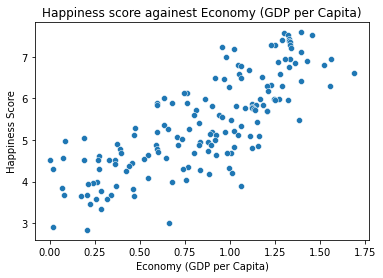

In [6]:
import seaborn as sns
plt.title("Happiness score againest Economy (GDP per Capita)")
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:title={'center':'Happiness Score vs Family'}, xlabel='Family', ylabel='Happiness Score'>

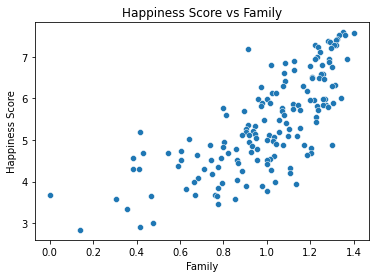

In [7]:
plt.title("Happiness Score vs Family")
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:title={'center':'Happiness Score vs Health(Life Expectancy)'}, xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

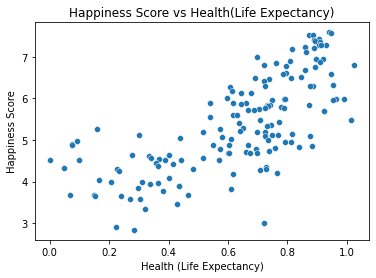

In [8]:
plt.title("Happiness Score vs Health(Life Expectancy)")
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:title={'center':'Happiness score againest Freedom'}, xlabel='Freedom', ylabel='Happiness Score'>

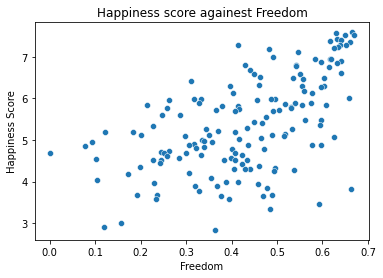

In [9]:
plt.title("Happiness score againest Freedom")
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:title={'center':'Happiness score againest Trust(Government Corruption)'}, xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

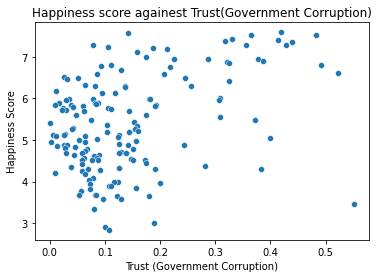

In [10]:
plt.title("Happiness score againest Trust(Government Corruption)")
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:title={'center':'Happiness score againest Generosity'}, xlabel='Generosity', ylabel='Happiness Score'>

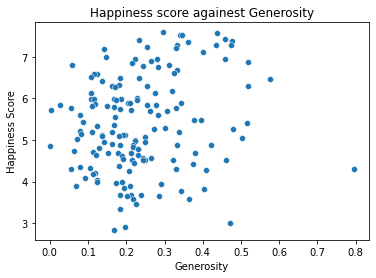

In [11]:
plt.title("Happiness score againest Generosity")
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

<AxesSubplot:title={'center':'Happiness score vs dystopia Residual'}, xlabel='Dystopia Residual', ylabel='Happiness Score'>

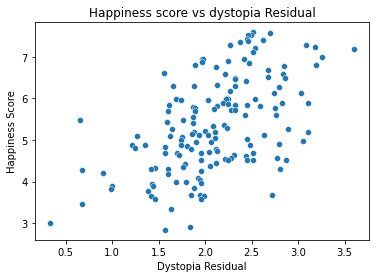

In [12]:
plt.title("Happiness score vs dystopia Residual")
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

# Correlation

In [13]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [14]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

highest correlation is with Economy(GDP Per Capita),Family and Health (Life Expectancy) and low correlation with Generosity and Trust (Government Corruption), Also a negative correlation with Happiness Rank

In [15]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Correlation using heatmap

<AxesSubplot:>

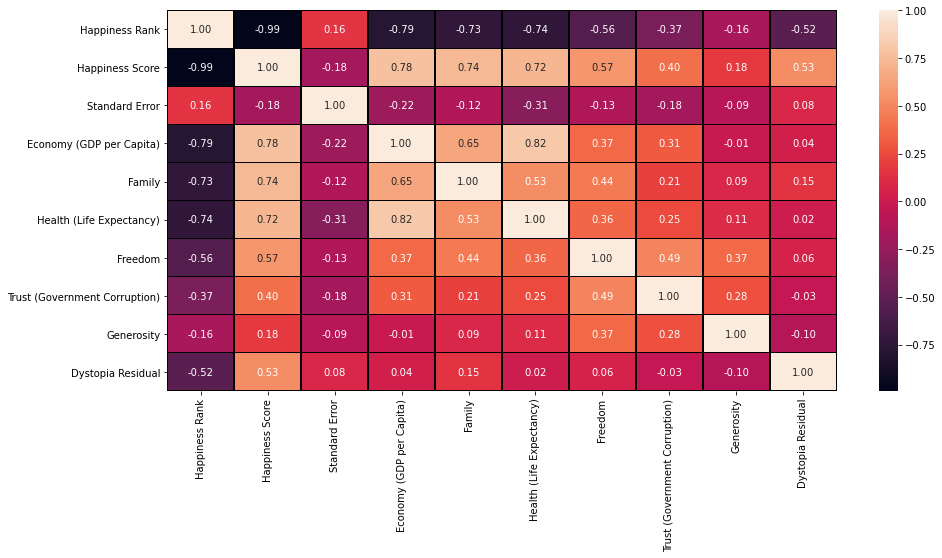

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),    annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

Economy (GDP per Capita) has 78 percent correlation towards Happiness Score
family has 74 percent correlation towards Happiness Score
Health(Life Expectancy) has 72 percent towards Happiness Score
Freedom has 57 percent correlation towards Happiness Score
Dystopia Residual has 53 percent correlation towards Happiness Score
Trust(Government Corruption) has 40 percent corelation towards Happiness Score
Generosity has least 18 percent correlation towards Happiness Score

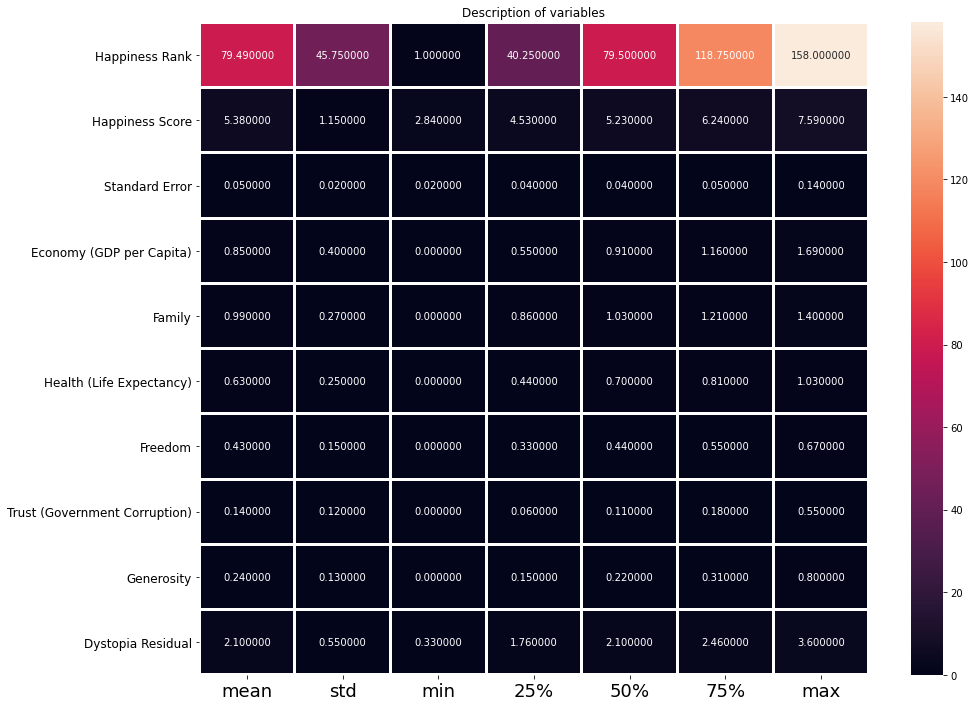

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Description of variables")
plt.show()

In [19]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [20]:
max_e=np.max(df['Economy (GDP per Capita)'])
max_e

1.69042

# Identifying Outliers

Happiness Rank                      AxesSubplot(0.125,0.657941;0.110714x0.222059)
Happiness Score                  AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Standard Error                   AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Family                           AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Health (Life Expectancy)         AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Freedom                             AxesSubplot(0.125,0.391471;0.110714x0.222059)
Trust (Government Corruption)    AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Generosity                       AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Dystopia Residual                AxesSubplot(0.523571,0.391471;0.110714x0.222059)
dtype: object

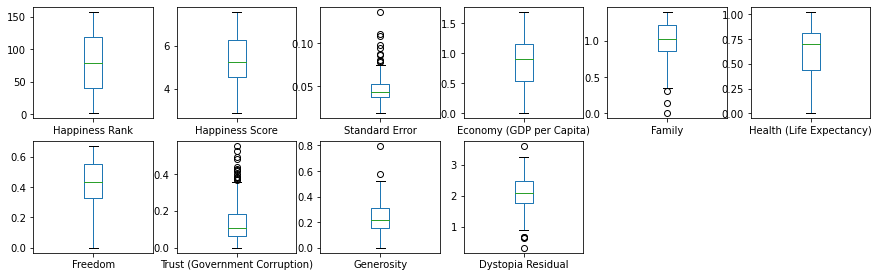

In [21]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(15,7))

Standard Error and Trust (Government Corruption) has more outliers
Family,Generosity,ystopia Residual has less outliers
The other columns Economy (GDP perCapita), Health(Life Expectancy),Freedom has no outliers

# Dropping Country column

In [22]:
df.drop('Country',axis=1,inplace=True)

# Encoding for Region column

In [23]:
le=LabelEncoder()
lis='Region'
df[lis]=le.fit_transform(df[lis].values.reshape(-1,1).astype(str))
df


,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing Outliers

In [24]:
#removing outliers
from scipy.stats import zscore
import numpy as np

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.30025593, 1.72099989, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.30025593, 1.69907456, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.30025593, 1.67714922, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.37544095, 1.67742676, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.96511655, 1.69935209, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.96511655, 1.72127743, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [26]:
df_new=df[(z<3).all(axis=1)]
df_new

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [27]:
df.shape

(158, 11)

In [28]:
df_new.shape

(149, 11)

In [29]:
df_new['Happiness Score'].shape

(149,)

In [30]:
df.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

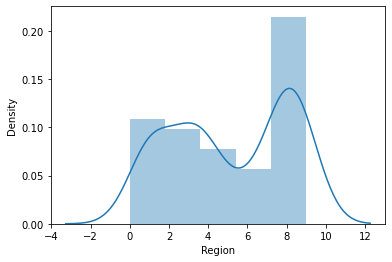

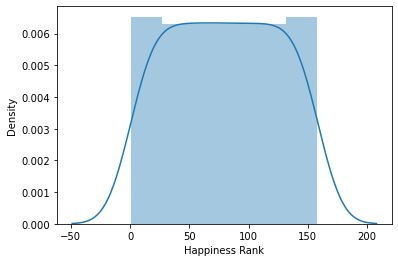

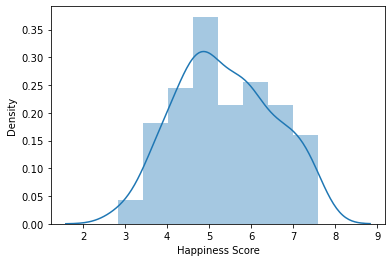

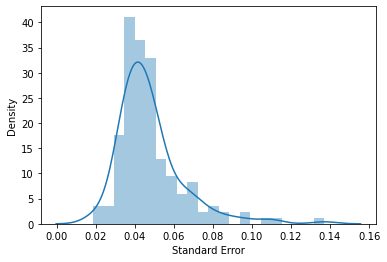

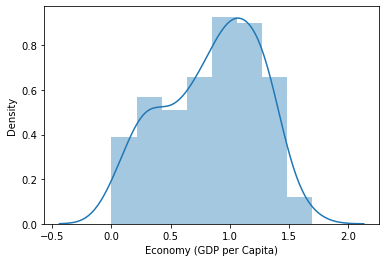

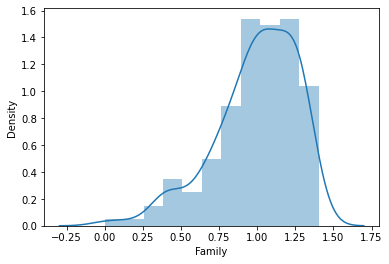

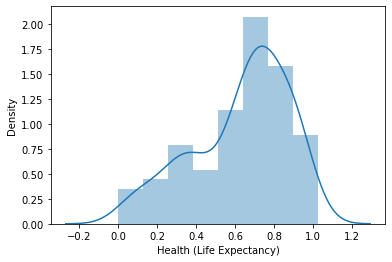

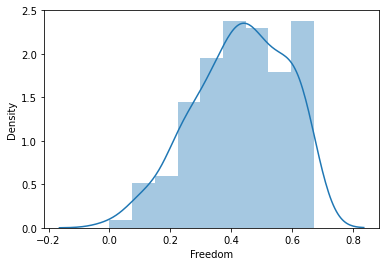

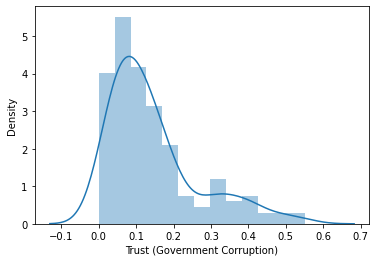

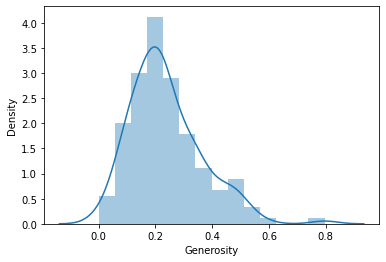

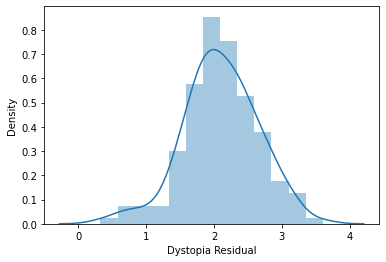

In [31]:
for i in df_new.columns:
    plt.figure()
    sns.distplot(df[i])


In [32]:
df.corr()['Happiness Score']

Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [33]:
x=df_new.iloc[:,:-1]
y=df_new['Happiness Score']
x.shape

(149, 10)

In [34]:
y.shape

(149,)

In [35]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.23451354, -2.05151352,  1.82591163, ...,  1.75498234,
         1.81762514,  0.65957855],
       [ 1.23451354, -1.99584442,  1.80625026, ...,  1.44218195,
         0.32967608,  1.56260401],
       [ 1.23451354, -1.94524081,  1.7804847 , ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [ 0.66673577,  1.53128908, -1.78998689, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [ 0.95527966,  1.56626337, -2.05390645, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [ 0.95527966,  1.60111233, -2.56623506, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [36]:
pd.DataFrame(x).skew()

0   -0.222589
1   -0.266578
2   -0.017940
3   -0.031216
4   -0.140644
5   -0.148528
6   -0.190663
7   -0.076489
8    0.174593
9    0.025172
dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.23451354, -2.05151352,  1.82591163, ...,  1.75498234,
         1.81762514,  0.65957855],
       [ 1.23451354, -1.99584442,  1.80625026, ...,  1.44218195,
         0.32967608,  1.56260401],
       [ 1.23451354, -1.94524081,  1.7804847 , ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [ 0.66673577,  1.53128908, -1.78998689, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [ 0.95527966,  1.56626337, -2.05390645, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [ 0.95527966,  1.60111233, -2.56623506, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [38]:
df_new.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.080537,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,3.032519,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,0.000000,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,3.000000,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,4.000000,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,8.000000,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,9.000000,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


In [39]:
x=df_new.drop(['Happiness Score'],axis=1)
y=df_new['Happiness Score']
x.shape

(149, 10)

In [40]:
y.shape

(149,)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [42]:
y_train.shape

(99,)

In [43]:
x_test.shape

(50, 10)

In [44]:
y_test.shape

(50,)

In [45]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
lm.score(x_train,y_train)

0.9999999369078534

In [47]:
#predict the value
    
pred=lm.predict(x_test)
print("predicted Happiness score:",pred)
print("actual Happiness score:",y_test)

predicted Happiness score: [5.28635284 6.93724496 4.51222935 5.19233983 5.21208002 6.47669168
 5.60465864 3.78081506 5.47393405 5.12420178 4.64234295 7.19967278
 6.29816589 7.28398023 6.90138028 5.81257603 3.90377266 5.42865039
 5.82409213 4.03311233 6.50503111 4.33219782 6.66960726 4.25198007
 4.21851326 3.65518437 4.63343818 4.78790487 5.97523138 6.48510623
 6.81010754 6.98249866 5.58864465 7.22552854 5.99513362 4.69396343
 5.85527121 6.57497266 7.42681377 6.45459896 4.4192384  5.09764608
 5.07327939 6.94619484 7.27754402 5.12886359 3.99481674 3.6672966
 5.25287706 4.67738727]
actual Happiness score: 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485


# Cross-Validation score for Linear Regression

In [48]:
from sklearn.model_selection import cross_val_score
lsscore=cross_val_score(lm,x,y,cv=5)
lsscore

array([0.99999912, 0.99999859, 0.99999818, 0.99999535, 0.99999925])

In [49]:
lsc=lsscore.mean()
lsc

0.9999980987465694

In [54]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean Squared Error: 1.4793002404225766


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=12)
lm.fit(x_train,y_train)

LinearRegression()

In [56]:

y_test=lm.predict(x_test)

In [58]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_test))

1.0


we get model accuracy and cross validation is 99% which shows the model is performing well